In [52]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [53]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [56]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [57]:
legit=df[df.Class==0]
fraud=df[df.Class==1]


In [58]:
legit_sample=legit.sample(n=492)
legit_sample.shape

(492, 31)

In [59]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
211523,138452.0,2.000611,0.046142,-1.963921,0.372111,0.489929,-0.742723,0.193600,-0.089221,0.259722,...,-0.177790,-0.501481,0.235590,0.598434,-0.152229,0.317827,-0.086208,-0.045427,16.01,0
269136,163546.0,-0.570712,0.483085,0.987438,-1.287505,-0.929130,-1.030087,0.126553,0.260015,0.319311,...,0.401377,1.093033,0.085298,0.554732,-0.755700,0.669871,0.020974,0.126622,59.00,0
53100,45814.0,1.291784,0.076848,-1.119914,-0.067019,2.152694,3.366349,-0.472972,0.811644,-0.079637,...,-0.108087,-0.430490,-0.053886,0.985250,0.702821,-0.423220,0.025223,0.018575,2.50,0
139957,83448.0,-0.516741,-3.318794,-1.051932,0.381703,-1.260091,0.156317,1.038298,-0.258759,-1.560501,...,-0.146527,-2.164696,-0.600018,-0.310219,-0.297173,0.021746,-0.201975,0.165922,960.89,0
19017,29960.0,1.092220,-0.055879,1.061024,1.634321,-0.735742,0.090468,-0.396169,0.169659,0.896511,...,-0.066379,0.161467,-0.028046,0.427453,0.559237,-0.277480,0.071112,0.025601,10.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [60]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98184.121951,0.023474,0.045757,0.001373,-0.024906,-0.074706,0.011693,0.013877,0.088844,0.012704,...,0.010129,-0.054573,-0.018274,-0.009315,-0.005206,-0.007819,0.015162,0.012040,-0.020037,84.564492
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [61]:
 x = new_dataset[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
                                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 
                                 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y=new_dataset.Class

In [62]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
211523,138452.0,2.000611,0.046142,-1.963921,0.372111,0.489929,-0.742723,0.193600,-0.089221,0.259722,...,-0.205973,-0.177790,-0.501481,0.235590,0.598434,-0.152229,0.317827,-0.086208,-0.045427,16.01
269136,163546.0,-0.570712,0.483085,0.987438,-1.287505,-0.929130,-1.030087,0.126553,0.260015,0.319311,...,0.020087,0.401377,1.093033,0.085298,0.554732,-0.755700,0.669871,0.020974,0.126622,59.00
53100,45814.0,1.291784,0.076848,-1.119914,-0.067019,2.152694,3.366349,-0.472972,0.811644,-0.079637,...,-0.017781,-0.108087,-0.430490,-0.053886,0.985250,0.702821,-0.423220,0.025223,0.018575,2.50
139957,83448.0,-0.516741,-3.318794,-1.051932,0.381703,-1.260091,0.156317,1.038298,-0.258759,-1.560501,...,1.426982,-0.146527,-2.164696,-0.600018,-0.310219,-0.297173,0.021746,-0.201975,0.165922,960.89
19017,29960.0,1.092220,-0.055879,1.061024,1.634321,-0.735742,0.090468,-0.396169,0.169659,0.896511,...,-0.227031,-0.066379,0.161467,-0.028046,0.427453,0.559237,-0.277480,0.071112,0.025601,10.00


In [63]:
y.head()

211523    0
269136    0
53100     0
139957    0
19017     0
Name: Class, dtype: int64

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor()
}

# Define scoring metric
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    scores = cross_val_score(model, x, y, cv=5, scoring=scoring)  # 5-fold CV
    rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
    cv_results[model_name] = {
        'mean_rmse': np.mean(rmse_scores),
        'std_rmse': np.std(rmse_scores)
    }

# Display results
for model_name, results in cv_results.items():
    print(f"\nModel: {model_name}")
    print(f"Mean RMSE: {results['mean_rmse']:.4f}")
    print(f"Standard Deviation of RMSE: {results['std_rmse']:.4f}")


Evaluating LinearRegression...
Evaluating Ridge...
Evaluating Lasso...
Evaluating DecisionTree...
Evaluating RandomForest...
Evaluating GradientBoosting...
Evaluating SVR...
Evaluating KNeighbors...

Model: LinearRegression
Mean RMSE: 0.4129
Standard Deviation of RMSE: 0.1093

Model: Ridge
Mean RMSE: 0.4130
Standard Deviation of RMSE: 0.1094

Model: Lasso
Mean RMSE: 0.5515
Standard Deviation of RMSE: 0.1546

Model: DecisionTree
Mean RMSE: 0.4593
Standard Deviation of RMSE: 0.1798

Model: RandomForest
Mean RMSE: 0.3063
Standard Deviation of RMSE: 0.1027

Model: GradientBoosting
Mean RMSE: 0.3805
Standard Deviation of RMSE: 0.1868

Model: SVR
Mean RMSE: 0.8793
Standard Deviation of RMSE: 0.0925

Model: KNeighbors
Mean RMSE: 0.7634
Standard Deviation of RMSE: 0.1715


In [69]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Train the model
modela = RandomForestClassifier(n_estimators=100)
modela.fit(x_train, y_train)  # Training data

# Make predictions on the test set
y_pred = modela.predict(x_test)  # Test data

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)


Confusion Matrix:
[[150   7]
 [ 10 129]]
Accuracy: 0.9425675675675675


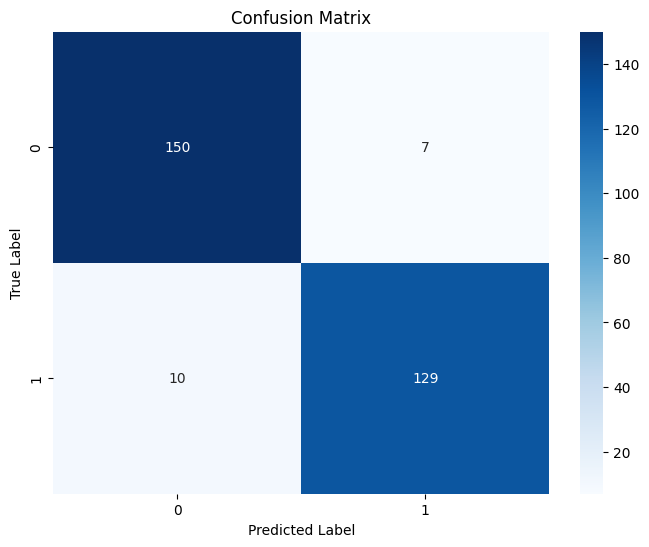

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Add labels, title, and formatting
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
